#### Abstract
This script performs exploratory data analysis on a movie dataset. It focuses on cleaning and analyzing various aspects of the film industry, including budget, revenue, popularity, and ratings. The analysis explores relationships between these variables, identifies top-performing movies in different categories, and examines trends in genres and production countries. Key visualizations include comparisons of expensive vs. cheap movies, profitability analysis, genre distribution, and the relationship between popularity and profit. The code utilizes Python libraries such as pandas, matplotlib, and seaborn to process the data and create informative visualizations, providing insights into the financial and popular aspects of the movie industry.

Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

In [3]:
# Display the shape of the dataset
movies_df.shape

(4803, 20)

In [4]:
# Display the first few rows to get a better sense of the data
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
# Display the info to get a better sense of the data
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [6]:
# Remove unnecessary columns
columns_to_remove = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']
movies_df = movies_df.drop(columns=columns_to_remove)

In [7]:
# Check if columns are dropped
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [8]:
# Remove duplicate rows
movies_df = movies_df.drop_duplicates()

In [9]:
# Display the shape of the dataset to check if the duplicates were removed
movies_df.shape

(4803, 12)

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [10]:
# Remove rows where budget is zero
movies_df.drop(movies_df.index[(movies_df['budget'] == 0)], axis=0, inplace=True)

In [11]:
# Remove rows where revenue is zero
movies_df.drop(movies_df.index[(movies_df['revenue'] == 0)], axis=0, inplace=True)

In [12]:
# Check shape before and after removal of missing data
print(f"Shape before removing zero budget/revenue: {movies_df.shape}")
movies_df = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]
print(f"Shape after removing zero budget/revenue: {movies_df.shape}")

Shape before removing zero budget/revenue: (3229, 12)
Shape after removing zero budget/revenue: (3229, 12)


In [13]:
# Double check that there are no zero values in both budget and revenue
print("Movies with zero budget:", movies_df[movies_df['budget'] == 0].shape[0])
print("Movies with zero revenue:", movies_df[movies_df['revenue'] == 0].shape[0])

Movies with zero budget: 0
Movies with zero revenue: 0


In [14]:
# Check the shape of the dataset after the removal of zero values
movies_df.shape

(3229, 12)

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [15]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [16]:
# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year

In [17]:
# Display movies per year using chaining method
movies_per_year = movies_df.query('release_year != 0').groupby(['release_year'])['release_year'].count()

print("Number of movies released per year:")
print(movies_per_year)

Number of movies released per year:
release_year
1916      1
1925      1
1927      1
1929      1
1930      1
       ... 
2012    137
2013    152
2014    135
2015    121
2016     72
Name: release_year, Length: 89, dtype: int64


Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [18]:
# Convert budget and revenue to int64
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

In [19]:
# Check if the data types were changed
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3229 entries, 0 to 4798
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   int64         
 1   genres                3229 non-null   object        
 2   id                    3229 non-null   int64         
 3   popularity            3229 non-null   float64       
 4   production_countries  3229 non-null   object        
 5   release_date          3229 non-null   datetime64[ns]
 6   revenue               3229 non-null   int64         
 7   runtime               3229 non-null   float64       
 8   spoken_languages      3229 non-null   object        
 9   title                 3229 non-null   object        
 10  vote_average          3229 non-null   float64       
 11  vote_count            3229 non-null   int64         
 12  release_year          3229 non-null   int32         
dtypes: datetime64[ns](1), f

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [20]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [21]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
4641,250,"['Drama', 'Comedy', 'Animation']",51942,0.293649,['United States of America'],1998-08-28,203,72.0,['English'],I Married a Strange Person!,7.5,12,1998


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [22]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action')]

In [23]:
# Display the action movies
action_movies

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664,230000,"['Drama', 'Action', 'Crime']",18533,18.450613,['United Kingdom'],2008-10-09,2260712,92.0,['English'],Bronson,6.9,733,2008
4670,400000,"['Adventure', 'Action', 'Thriller', 'Science F...",9659,33.142185,['Australia'],1979-04-12,100000000,93.0,['English'],Mad Max,6.6,1213,1979
4701,150000,"['Action', 'Drama', 'Romance']",5822,0.132878,['United States of America'],1971-04-23,15200000,97.0,['English'],Sweet Sweetback's Baadasssss Song,4.6,18,1971
4772,31192,"['Drama', 'Action', 'Comedy']",42151,1.330379,['United Kingdom'],2009-09-01,10000,89.0,['English'],Down Terrace,6.3,26,2009


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [24]:
# 5 most expensive movies
most_expensive = movies_df.nlargest(5, 'budget')[['title', 'budget', 'revenue', 'release_year']]

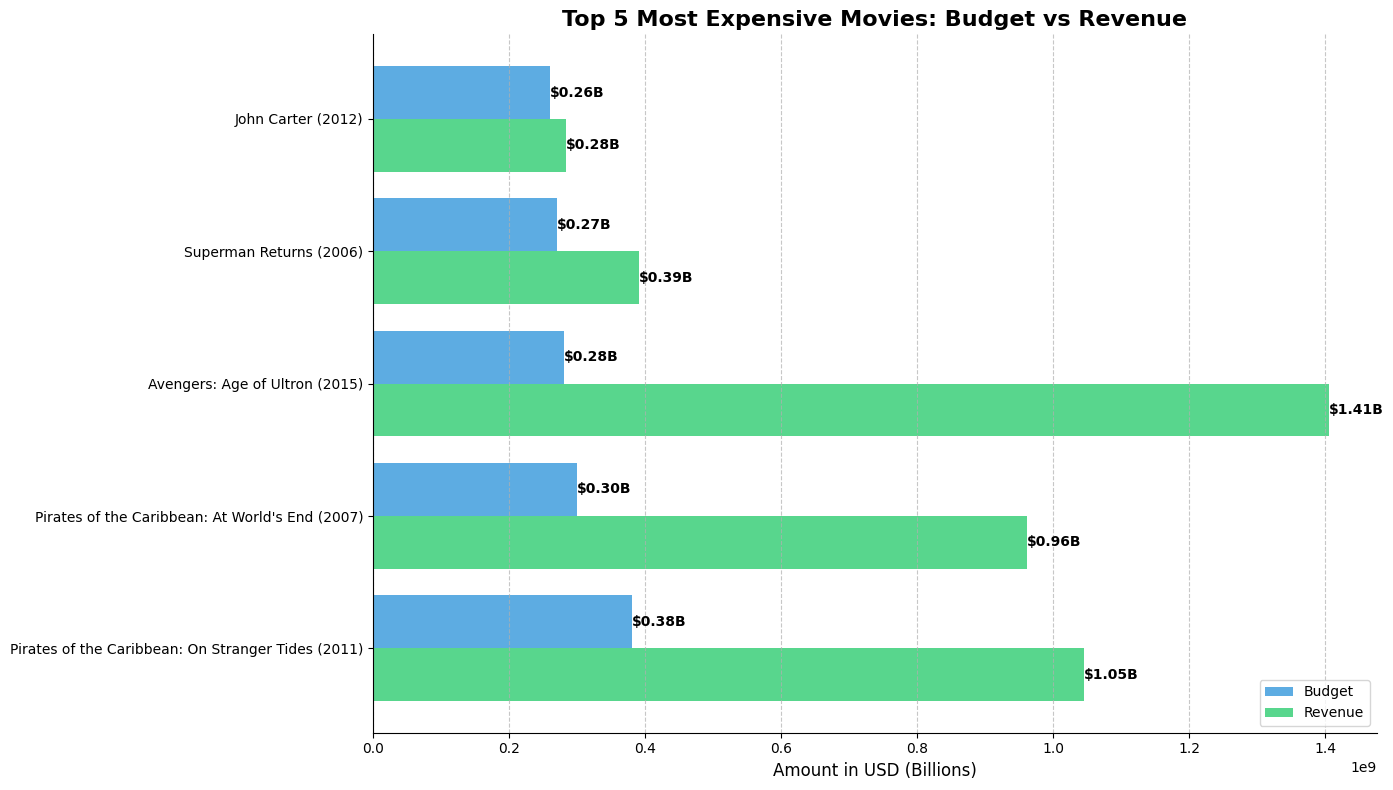

In [25]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Sort the dataframe by budget in descending order
most_expensive_sorted = most_expensive.sort_values('budget', ascending=True)

# Create horizontal bars
y_pos = np.arange(len(most_expensive_sorted))
ax.barh(y_pos - 0.2, most_expensive_sorted['budget'], height=0.4, label='Budget', color='#3498db', alpha=0.8)
ax.barh(y_pos + 0.2, most_expensive_sorted['revenue'], height=0.4, label='Revenue', color='#2ecc71', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(most_expensive_sorted['title'])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('Amount in USD (Billions)', fontsize=12)
ax.set_title('Top 5 Most Expensive Movies: Budget vs Revenue', fontsize=16, fontweight='bold')

# Add a grid for easier comparison
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'${width/1e9:.2f}B', 
                ha='left', va='center', fontweight='bold', fontsize=10)


add_value_labels(ax.containers[0])
add_value_labels(ax.containers[1])

# Adjust legend
ax.legend(loc='lower right', frameon=True, fontsize=10)

# Add release year to the y-axis labels
labels = [f"{title} ({year})" for title, year in zip(most_expensive_sorted['title'], most_expensive_sorted['release_year'])]
ax.set_yticklabels(labels)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [26]:
# Print the data
print("\nDetails of the 5 Most Expensive Movies:")
print(most_expensive_sorted)


Details of the 5 Most Expensive Movies:
                                          title     budget     revenue  \
4                                   John Carter  260000000   284139100   
10                             Superman Returns  270000000   391081192   
7                       Avengers: Age of Ultron  280000000  1405403694   
1      Pirates of the Caribbean: At World's End  300000000   961000000   
17  Pirates of the Caribbean: On Stranger Tides  380000000  1045713802   

    release_year  
4           2012  
10          2006  
7           2015  
1           2007  
17          2011  


#### Which are the 5 most expensive movies? (Answer)
Here are the 5 most expensive movies:
1) Pirates of the Caribbean: On Stranger Tides
2) Pirates of the Caribbean: At World's End
3) Avengers: Age of Ultron
4) Superman Returns
5) John Carter

#### How do the most expensive and cheapest movies compare?

In [27]:
# Calculate profit for the entire dataset
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

In [28]:
# Sort movies by budget
movies_df_sorted = movies_df.sort_values('budget', ascending=False)

In [29]:
# Get top 10 most expensive and cheapest movies
top_10_expensive = movies_df_sorted.head(10)
top_10_cheapest = movies_df_sorted.tail(10)

In [30]:
# Calculate average metrics
expensive_avg = top_10_expensive[['budget', 'revenue', 'profit', 'vote_average']].mean()
cheapest_avg = top_10_cheapest[['budget', 'revenue', 'profit', 'vote_average']].mean()

In [31]:
# Print average metrics
print("Average Metrics:")
print(pd.DataFrame({'Expensive': expensive_avg, 'Cheapest': cheapest_avg}).T)

Average Metrics:
                budget      revenue       profit  vote_average
Expensive  276300000.0  776533692.7  500233692.7          6.59
Cheapest          11.1    1850010.2    1849999.1          6.27


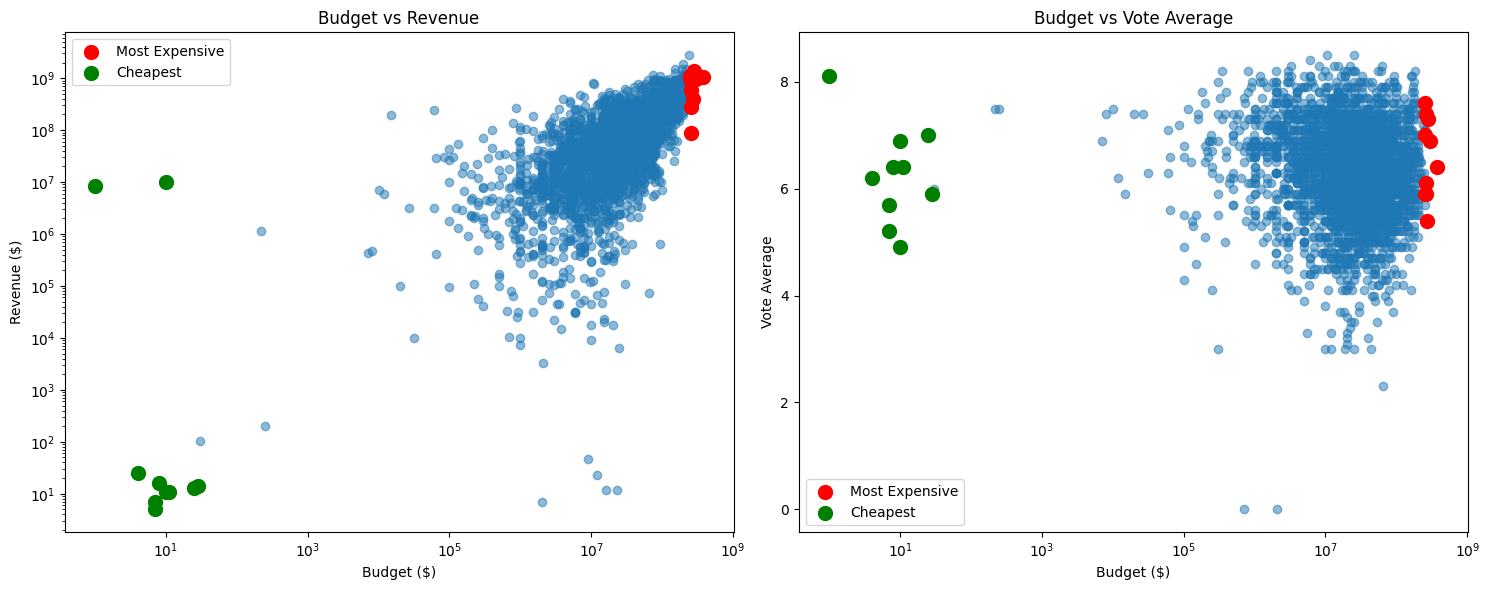

In [32]:
# Visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Budget vs Revenue
ax1.scatter(movies_df['budget'], movies_df['revenue'], alpha=0.5)
ax1.scatter(top_10_expensive['budget'], top_10_expensive['revenue'], color='red', s=100, label='Most Expensive')
ax1.scatter(top_10_cheapest['budget'], top_10_cheapest['revenue'], color='green', s=100, label='Cheapest')
ax1.set_title('Budget vs Revenue')
ax1.set_xlabel('Budget ($)')
ax1.set_ylabel('Revenue ($)')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()

# Budget vs Vote Average
ax2.scatter(movies_df['budget'], movies_df['vote_average'], alpha=0.5)
ax2.scatter(top_10_expensive['budget'], top_10_expensive['vote_average'], color='red', s=100, label='Most Expensive')
ax2.scatter(top_10_cheapest['budget'], top_10_cheapest['vote_average'], color='green', s=100, label='Cheapest')
ax2.set_title('Budget vs Vote Average')
ax2.set_xlabel('Budget ($)')
ax2.set_ylabel('Vote Average')
ax2.set_xscale('log')
ax2.legend()

plt.tight_layout()
plt.show()

#### How do the most expensive and cheapest movies compare? (Answer)
Generally, the higher the budget the better chance there is that the movie will make more revenue.
However, having a higher budget does not mean viewers will vote higher on the movies.

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [33]:
# Get the top 5 most profitable movies
top_5_profitable = movies_df.nlargest(5, 'profit')[['title', 'budget', 'revenue', 'profit', 'release_year']]

In [34]:
# Get the bottom 5 least profitable movies
bottom_5_profitable = movies_df.nsmallest(5, 'profit')[['title', 'budget', 'revenue', 'profit', 'release_year']]

In [35]:
# Display the results
print("Top 5 Most Profitable Movies:")
print(top_5_profitable.to_string(index=False))

print("\nBottom 5 Least Profitable Movies:")
print(bottom_5_profitable.to_string(index=False))

Top 5 Most Profitable Movies:
         title    budget    revenue     profit  release_year
        Avatar 237000000 2787965087 2550965087          2009
       Titanic 200000000 1845034188 1645034188          1997
Jurassic World 150000000 1513528810 1363528810          2015
     Furious 7 190000000 1506249360 1316249360          2015
  The Avengers 220000000 1519557910 1299557910          2012

Bottom 5 Least Profitable Movies:
                       title    budget  revenue     profit  release_year
             The Lone Ranger 255000000 89289910 -165710090          2013
                   The Alamo 145000000 25819961 -119180039          2004
             Mars Needs Moms 150000000 38992758 -111007242          2011
            The 13th Warrior 160000000 61698899  -98301101          1999
The Adventures of Pluto Nash 100000000  7103973  -92896027          2002


In [36]:
# Calculate and display the profit range
max_profit = movies_df['profit'].max()
min_profit = movies_df['profit'].min()
profit_range = max_profit - min_profit

print(f"\nProfit Range: ${profit_range:,.2f}")
print(f"Maximum Profit: ${max_profit:,.2f}")
print(f"Minimum Profit: ${min_profit:,.2f}")


Profit Range: $2,716,675,177.00
Maximum Profit: $2,550,965,087.00
Minimum Profit: $-165,710,090.00


In [37]:
# Calculate median profit
median_profit = movies_df['profit'].median()
print(f"Median Profit: ${median_profit:,.2f}")

Median Profit: $26,165,571.00


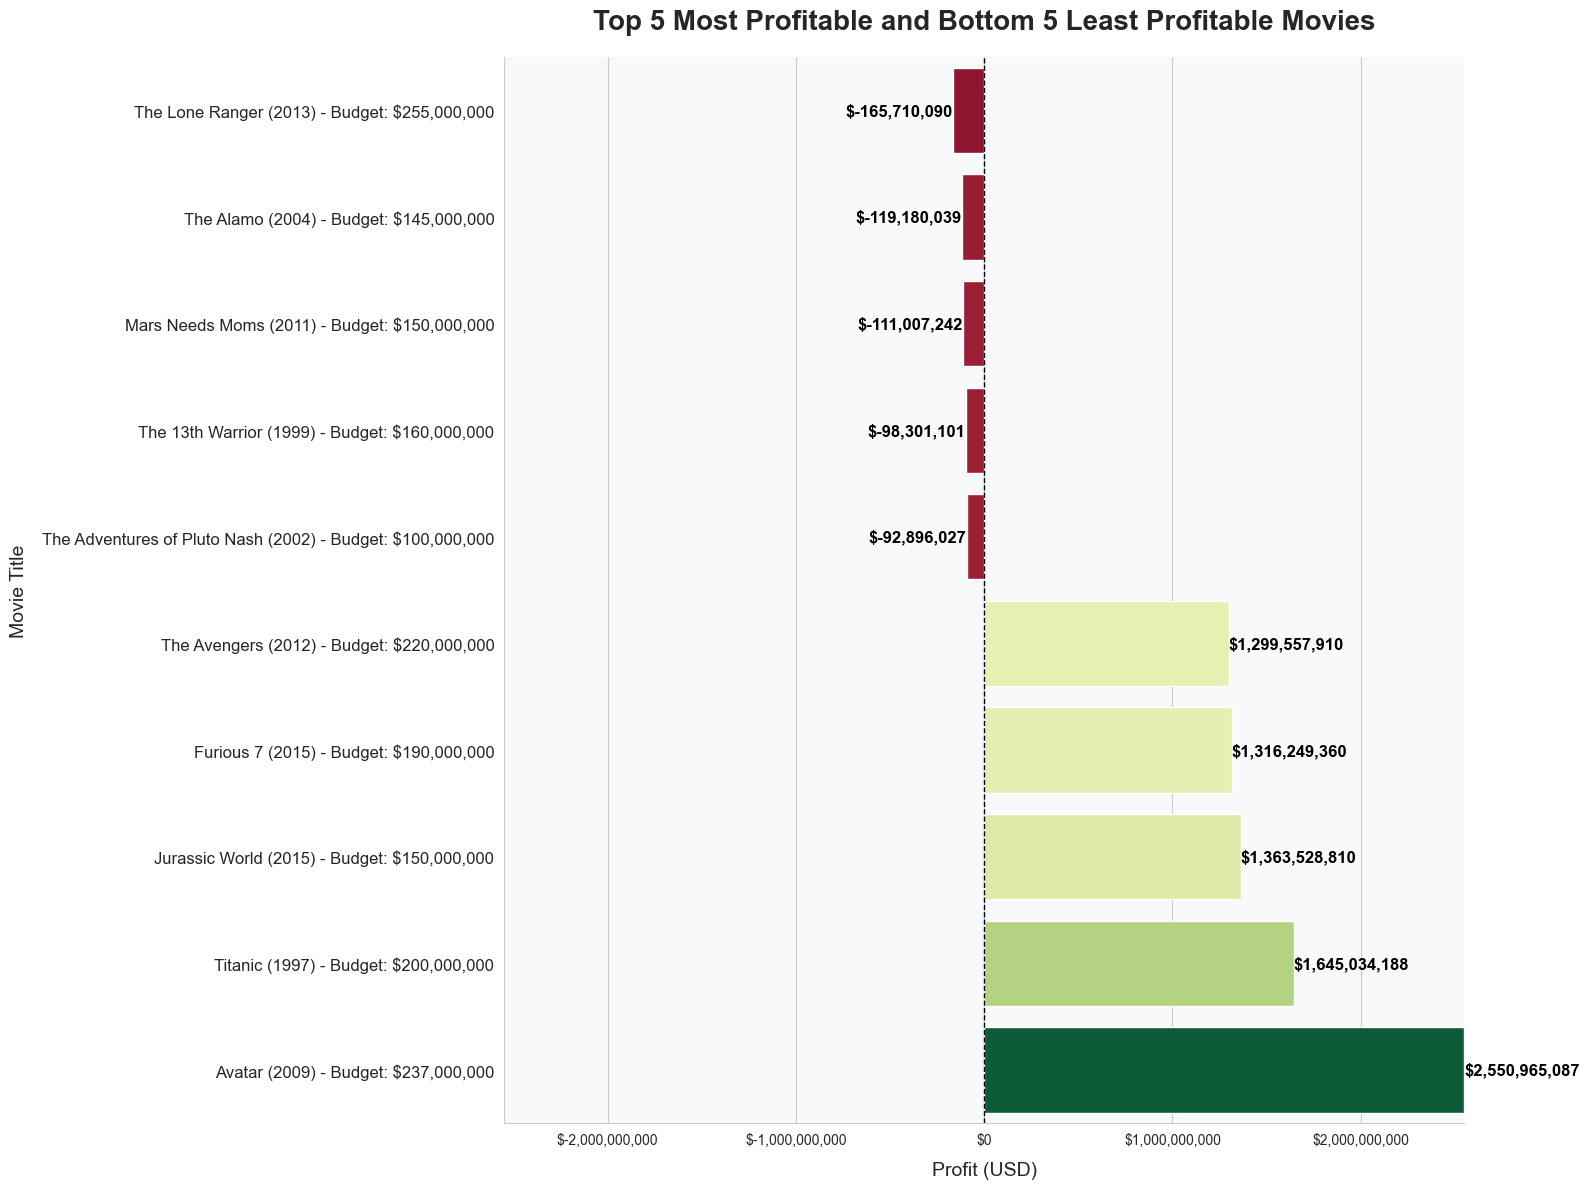

In [38]:
# Combine the top and bottom profitable movies
combined_df = pd.concat([top_5_profitable, bottom_5_profitable])

# Sort by profit
combined_df = combined_df.sort_values('profit', ascending=True)

# Set up the plot
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

# Create the horizontal bar plot
ax = sns.barplot(x='profit', y='title', hue='profit', data=combined_df, 
                 palette='RdYlGn', dodge=False)

# Remove legend
plt.legend([],[], frameon=False)

# Customize the plot
plt.title('Top 5 Most Profitable and Bottom 5 Least Profitable Movies', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Profit (USD)', fontsize=14, labelpad=10)
plt.ylabel('Movie Title', fontsize=14, labelpad=10)

# Format x-axis labels
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add value labels
for i, v in enumerate(combined_df['profit']):
    if v >= 0:
        ax.text(v, i, f'${v:,.0f}', va='center', fontweight='bold', 
                ha='left', fontsize=12, color='black')
    else:
        ax.text(v, i, f'${v:,.0f}', va='center', fontweight='bold', 
                ha='right', fontsize=12, color='black')

# Add release year and budget to y-axis labels
labels = [f"{title} ({year}) - Budget: ${budget:,.0f}" 
          for title, year, budget in zip(combined_df['title'], combined_df['release_year'], combined_df['budget'])]
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=12)

# Add a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

# Remove top and right spines
sns.despine()

# Add subtle background color
ax.set_facecolor('#f8f9fa')

# Ensure x-axis limits are symmetrical
max_abs_profit = max(abs(combined_df['profit'].min()), abs(combined_df['profit'].max()))
ax.set_xlim(-max_abs_profit, max_abs_profit)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [39]:
# Most popular movies
most_popular = movies_df.nlargest(5, 'popularity')[['title', 'popularity', 'release_year']]

In [40]:
# Display the 5 most popular movies
print("5 Most Popular Movies:")
most_popular

5 Most Popular Movies:


,title,popularity,release_year
546,Minions,875.581305,2015
95,Interstellar,724.247784,2014
788,Deadpool,514.569956,2016
94,Guardians of the Galaxy,481.098624,2014
127,Mad Max: Fury Road,434.278564,2015


In [41]:
# Sort in ascending order for bottom-to-top display
most_popular = most_popular.sort_values('popularity', ascending=True)

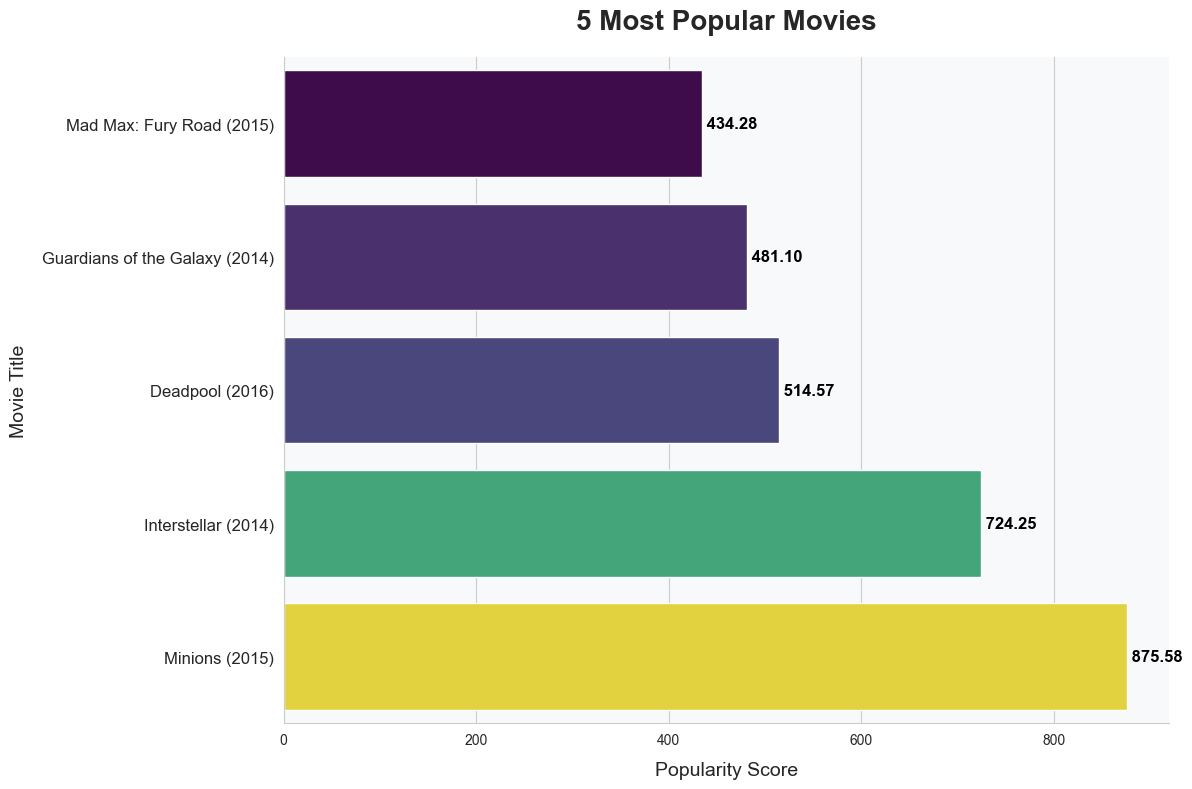

In [42]:
# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create the horizontal bar plot
ax = sns.barplot(x='popularity', y='title', data=most_popular, 
                 hue='popularity', palette='viridis', orient='h')

# Customize the plot
plt.title('5 Most Popular Movies', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Popularity Score', fontsize=14, labelpad=10)
plt.ylabel('Movie Title', fontsize=14, labelpad=10)

# Add value labels
for i, v in enumerate(most_popular['popularity']):
    ax.text(v, i, f' {v:.2f}', va='center', fontweight='bold', 
            ha='left', fontsize=12, color='black')

# Add release year to y-axis labels
labels = [f"{title} ({year})" for title, year in zip(most_popular['title'], most_popular['release_year'])]
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=12)

# Remove top and right spines
sns.despine()

# Add subtle background color
ax.set_facecolor('#f8f9fa')

# Remove the legend
plt.legend([],[], frameon=False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Find Movies which are rated above 7

In [43]:
# Movies rated above 7
high_rated = movies_df[movies_df['vote_average'] > 7].sort_values('vote_average', ascending=False).head(10)
print("\n10 Highest Rated Movies (Above 7):")
print(high_rated[['title', 'vote_average', 'release_year']])


10 Highest Rated Movies (Above 7):
                         title  vote_average  release_year
1881  The Shawshank Redemption           8.5          1994
2970        There Goes My Baby           8.5          1994
3337             The Godfather           8.4          1972
3865                  Whiplash           8.3          2014
662                 Fight Club           8.3          1999
2294             Spirited Away           8.3          2001
1818          Schindler's List           8.3          1993
2731    The Godfather: Part II           8.3          1974
3232              Pulp Fiction           8.3          1994
1987      Howl's Moving Castle           8.2          2004


In [44]:
# Sort in ascending order for bottom-to-top display
high_rated = high_rated.sort_values('vote_average', ascending=True)

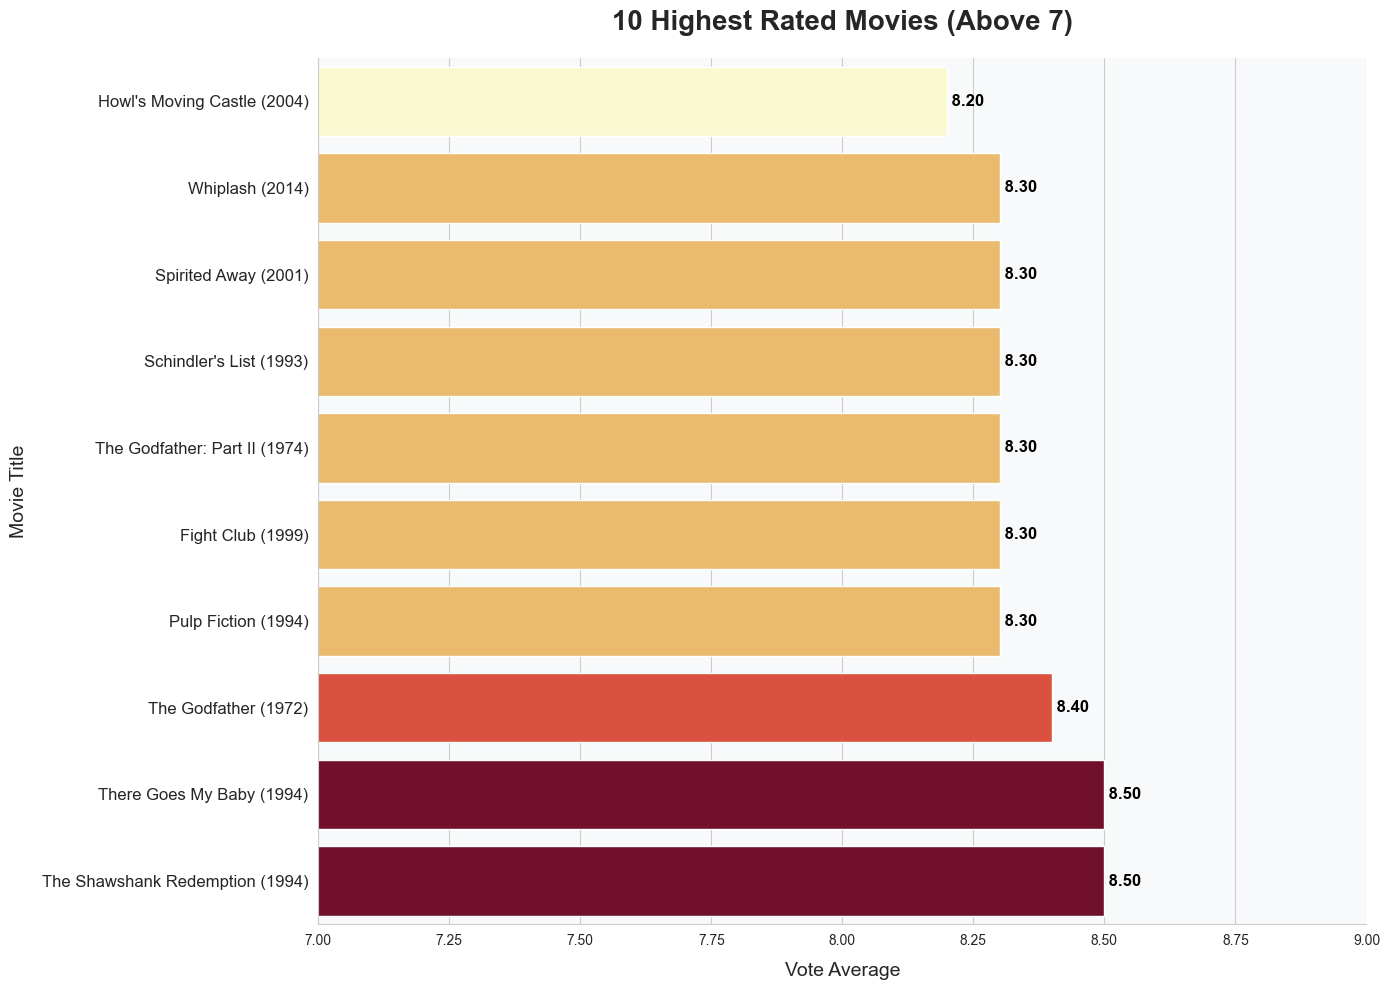

In [45]:
# Set up the plot
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Create the horizontal bar plot
ax = sns.barplot(x='vote_average', y='title', data=high_rated, 
                 hue='vote_average', palette='YlOrRd', orient='h')

# Customize the plot
plt.title('10 Highest Rated Movies (Above 7)', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Vote Average', fontsize=14, labelpad=10)
plt.ylabel('Movie Title', fontsize=14, labelpad=10)

# Add value labels
for i, v in enumerate(high_rated['vote_average']):
    ax.text(v, i, f' {v:.2f}', va='center', fontweight='bold', 
            ha='left', fontsize=12, color='black')

# Add release year to y-axis labels
labels = [f"{title} ({year})" for title, year in zip(high_rated['title'], high_rated['release_year'])]
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=12)

# Set x-axis limits
plt.xlim(7, max(high_rated['vote_average']) + 0.5)

# Remove top and right spines
sns.despine()

# Add subtle background color
ax.set_facecolor('#f8f9fa')

# Remove the legend
plt.legend([],[], frameon=False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

In [46]:
# Most successful genres
genres = movies_df['genres'].str.strip('[]').str.replace("'", "").str.split(', ')
genre_counts = pd.Series([genre for sublist in genres for genre in sublist]).value_counts()

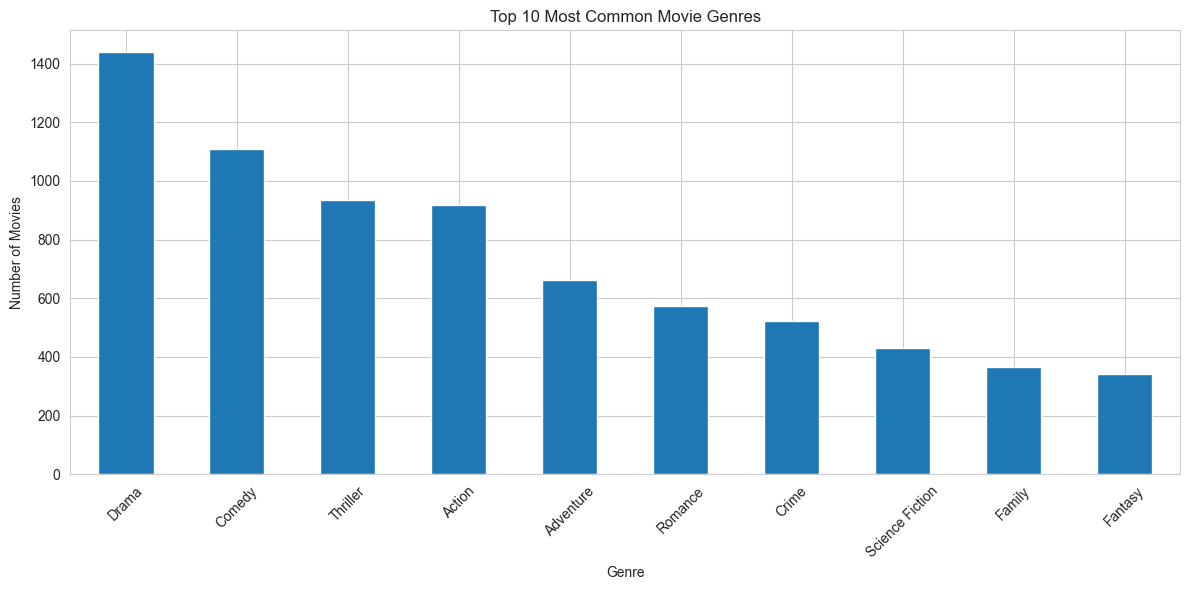

In [47]:
# Setup the plot
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate three different interesting visualisations with a data story.

In [48]:
# 1. Average movie rating by release month
movies_df['release_month'] = pd.to_datetime(movies_df['release_date']).dt.month
monthly_ratings = movies_df.groupby('release_month')['vote_average'].mean().reindex(range(1,13))

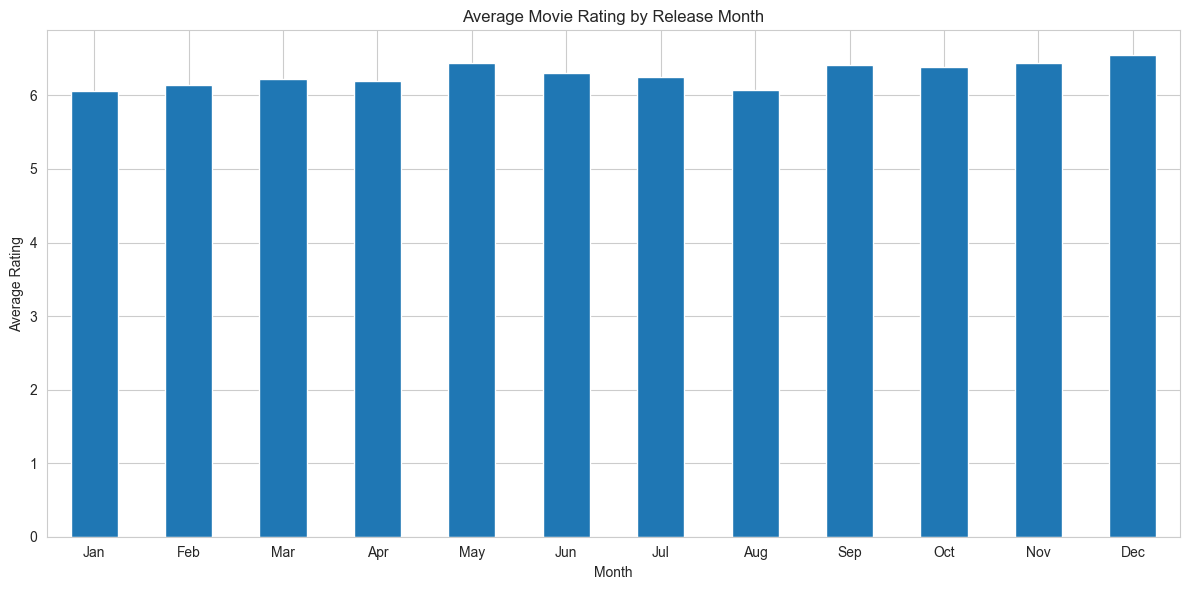

In [49]:
# Create a bar plot:
plt.figure(figsize=(12, 6))
monthly_ratings.plot(kind='bar')
plt.title('Average Movie Rating by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tight_layout()
plt.show()

### Comment:
It would seem that the average rating throughout the months are around 6/10.
The month release date does not have an effect on the ratings.

In [50]:
# 2. Top 10 countries by movie production
countries = movies_df['production_countries'].str.strip('[]').str.replace("'", "").str.split(', ')
country_counts = pd.Series([country for sublist in countries for country in sublist]).value_counts().head(10)

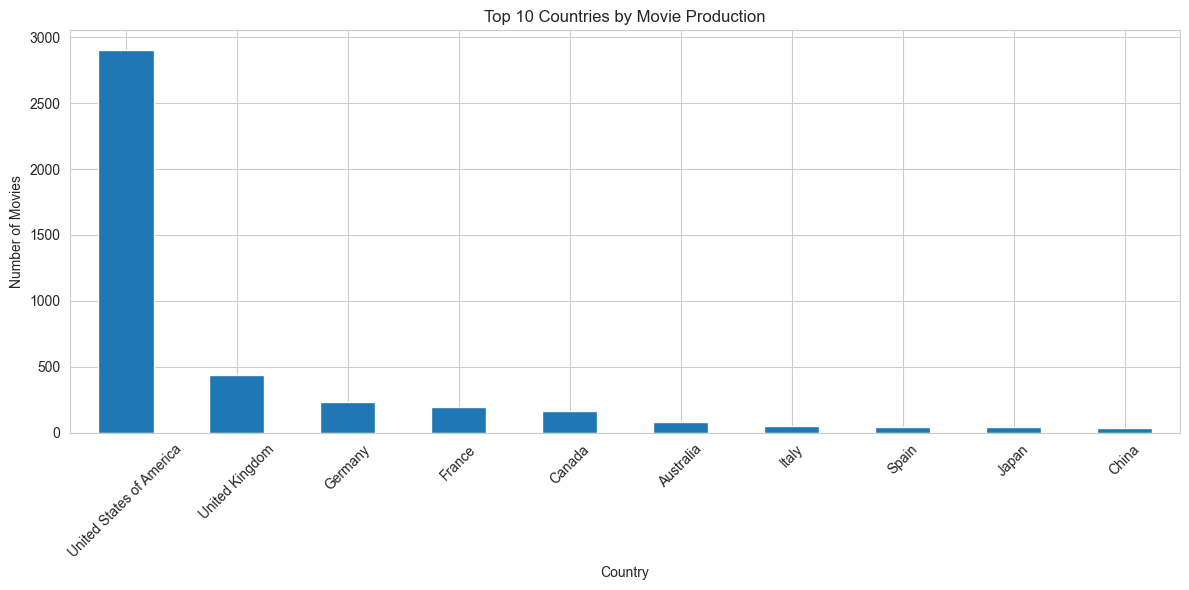

In [51]:
# Create a bar plot
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Top 10 Countries by Movie Production')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Comment:
It is clear that the most movies are made in the USA.

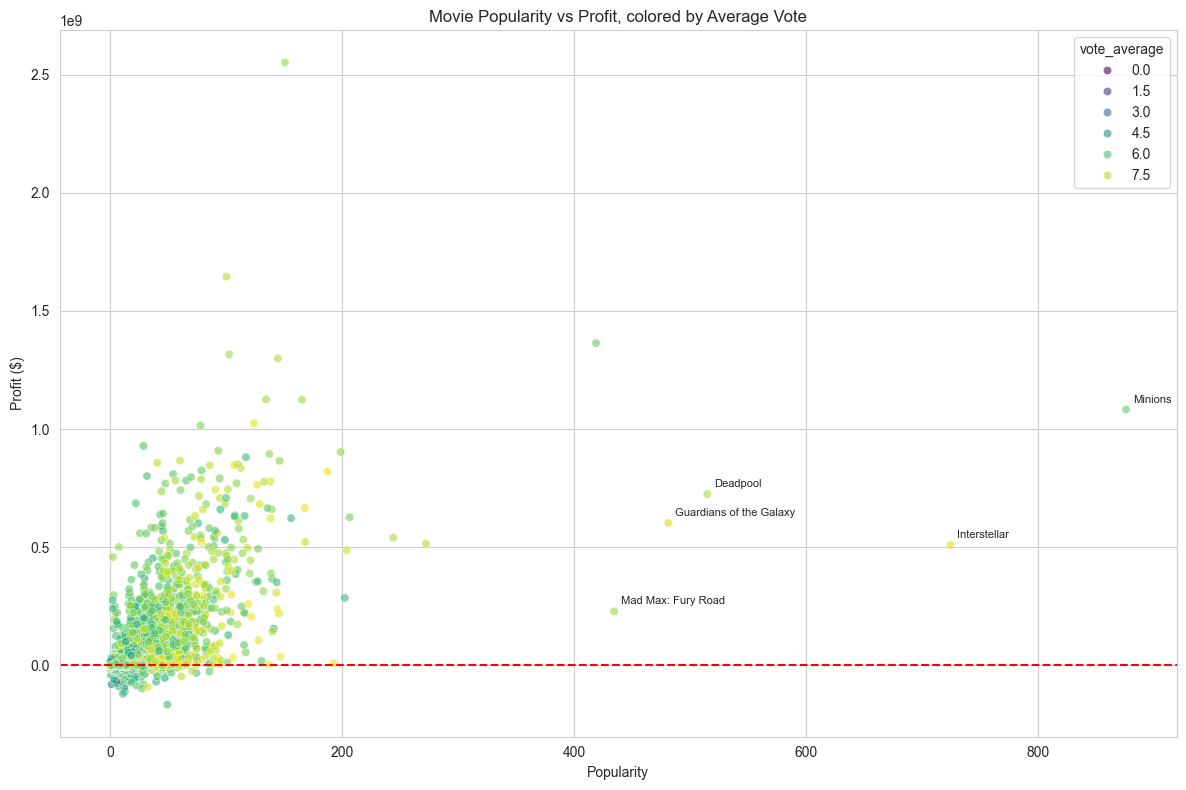

In [52]:
# 3. Relationship between popularity and profitability
plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(x='popularity', y='profit', data=movies_df, alpha=0.6, hue='vote_average', palette='viridis')

plt.title('Movie Popularity vs Profit, colored by Average Vote')
plt.xlabel('Popularity')
plt.ylabel('Profit ($)')

# Add a horizontal line at y=0 to show the break-even point
plt.axhline(y=0, color='r', linestyle='--')

# Annotate some interesting points
top_popular = movies_df.nlargest(5, 'popularity')
for _, movie in top_popular.iterrows():
    plt.annotate(movie['title'], (movie['popularity'], movie['profit']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

In [53]:
# Print some statistics
print("Correlation between popularity and profit:", movies_df['popularity'].corr(movies_df['profit']))
print("\nTop 5 most popular movies:")
print(top_popular[['title', 'popularity', 'profit', 'vote_average']])

print("\nTop 5 most profitable movies:")
print(movies_df.nlargest(5, 'profit')[['title', 'popularity', 'profit', 'vote_average']])

Correlation between popularity and profit: 0.5881904175219117

Top 5 most popular movies:
                       title  popularity      profit  vote_average
546                  Minions  875.581305  1082730962           6.4
95              Interstellar  724.247784   510120017           8.1
788                 Deadpool  514.569956   725112979           7.4
94   Guardians of the Galaxy  481.098624   603328629           7.9
127       Mad Max: Fury Road  434.278564   228858340           7.2

Top 5 most profitable movies:
             title  popularity      profit  vote_average
0           Avatar  150.437577  2550965087           7.2
25         Titanic  100.025899  1645034188           7.5
28  Jurassic World  418.708552  1363528810           6.5
44       Furious 7  102.322217  1316249360           7.3
16    The Avengers  144.448633  1299557910           7.4


### Comment:
There is a relationship between popularity and profitability. I was expecting the most profitable movies
to be the most popular, however, this was not the case. The most popular movies ranged on the upper end of profitability without
becoming outliers as I expected.

#### Final observations and key findings

##### 5 Most expensive movies

The most expensive movies were Pirates of the Caribbean - On Stranger Tides, Pirates of the Caribbean - At World's End, Avengers: Age of Ultron, Superman Returns and John Carter.

When taking revenue, budget and vote average into consideration with the most and least expensive movies the data suggests that movies with higher budgets usually have more revenue compared to movies with low budgets.

Movies with high budgets do not necessarily translate into higher vote average. Movies with low budgets are on par with movies with high budgets when looking at vote average.

##### 5 Most and least profitable movies

The data highlights the 5 most profitable movies: Avatar (2009), Titanic (1997), Jurassic World (2015), Furious 7 (2015), The Avengers (2012). It also highlights the 5 least profitable movies: The Adventures of Pluto Nash, The 13th Warrior (1999),
Mars Needs Moms (2011), The Alamo (2004), The Lone Ranger (2013). These 5 least profitable movies all made significant losses.

##### 5 Most popular movies

The data indicates the 5 most popular movies which were: Minions, Interstellar, Deadpool, Guardians of the Galaxy and Mad Max: Fury Road. 
The popularity of these movies could be due to the marketing strategies which the production companies employed. 

##### 10 highest rated movies
The top 3 of of the 10 movies are Shawshank Redemption, There Goes My Baby and Godfather. These top 10 movies are relatively old, which could indicates that older movies could have more desirable characteristics, such as production and storytelling quality.

##### The 4 most common categories
The 4 most common categories are: ‘Drama’, ‘Comedy’, ‘Thriller’ and ‘Action’. This could indicate what most viewers enjoy watching these genres and therefore the movies that are made often fall in those categories. 

##### Average movie rating by release month
The data tries to uncover if there is a relation between the month of the year and the average rating movies recieve. The graph does not indicate any significant correlation.

##### Top 10 countries by movie producation
By far that the most movies are made in the United States of America compared to other countries. This finding is not of a big surprise as the US is widely known as having a prominent movie making culture. What is surprising is the number of movies made by the US in comparison to other countries.  

##### Movie popularity and profit by average vote
The  graph shows the relation between profit, popularity and voting average. It was expected that the most profitable movies were the most popular ones (the outliers in profitability and popularity). This was not the case. The most popular movies ranged on the upper end of profitability without becoming visible outliers of that data reading.

#### NOTE FOR TUTOR
Thank you so very much for all your time and effort grading and helping me improve. It is appreciated a lot! :)
Just so that you know, for some or other reason I do not get any errors when running my code. I did, however, remove the legend parameter from sns plot.

#### References:
Shovic, J & Simpson, A. 2019. Python all in one for dummies. John Wiley & Sons. New Jersey, USA.

Mark - A friend of mine also guided me when I struggled.